In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import re
import os

plt.rcParams['font.size'] = '16'

palette = sns.color_palette("colorblind")

# Get blue, orange, and green
blue   = palette[0]  # Usually a bluish tone
orange = palette[1]  # Orangish
green  = palette[2]  # Greenish

def plot_validation_mcc(base_path, param_name="n"):
    # Find all metrics.csv files
    metric_paths = glob(f"{base_path}/validate/{param_name}_*/**/metrics.csv", recursive=True)

    records = []

    for path in metric_paths:
        try:
            # Extract parameter n and biolm from the path
            match_param = re.search(fr"{param_name}_([0-9]*\.?[0-9]+)", path)
            biolm = path.split(os.sep)[-2]  # [base_path]/n_[param_n]/[biolm]/validate/metrics.csv
            
            if not match_param:
                continue

            n_val = float(match_param.group(1))
            df = pd.read_csv(path)
            mcc = df["mcc"].iloc[-1]  # last epoch's mcc (or use 0 if only 1 epoch)

            records.append({
                param_name: n_val,
                "biolm": biolm,
                "mcc": mcc
            })
        except Exception as e:
            print(f"Skipping {path}: {e}")
            continue

    if not records:
        raise ValueError("No valid metric files found.")

    result_df = pd.DataFrame(records)
    result_df[param_name] = result_df[param_name].astype(float)
    result_df = result_df.sort_values(by=['mcc'])
    print(result_df.to_string(index=False))
    
    # Plot
    plt.figure(figsize=(10, 6), dpi=200)
    sns.lineplot(
        data=result_df,
        x=param_name,
        y="mcc",
        hue="biolm",
        marker="o",
        palette=[orange, blue, green]
    )

    plt.title("Validation MCC to choose a threshold parameter n")
    plt.xlabel(param_name)
    plt.ylabel("score")
    plt.ylim((-0.05, 1))
    plt.legend(title="BioLM", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()



      n biolm     mcc
2.00000  MINT 0.00000
3.00000  MINT 0.00000
3.00000  ESM2 0.09325
1.00000  MINT 0.16294
2.00000  ESM2 0.25342
0.03125  gLM2 0.35143
0.50000  gLM2 0.36212
0.06250  gLM2 0.37870
0.50000  MINT 0.40000
1.00000  gLM2 0.40141
0.12500  gLM2 0.40388
1.00000  ESM2 0.41439
3.00000  gLM2 0.41477
2.00000  gLM2 0.44229
0.03125  MINT 0.45406
0.12500  MINT 0.45406
0.06250  MINT 0.45406
0.06250  ESM2 0.45406
0.03125  ESM2 0.45406
0.50000  ESM2 0.48378
0.12500  ESM2 0.48378


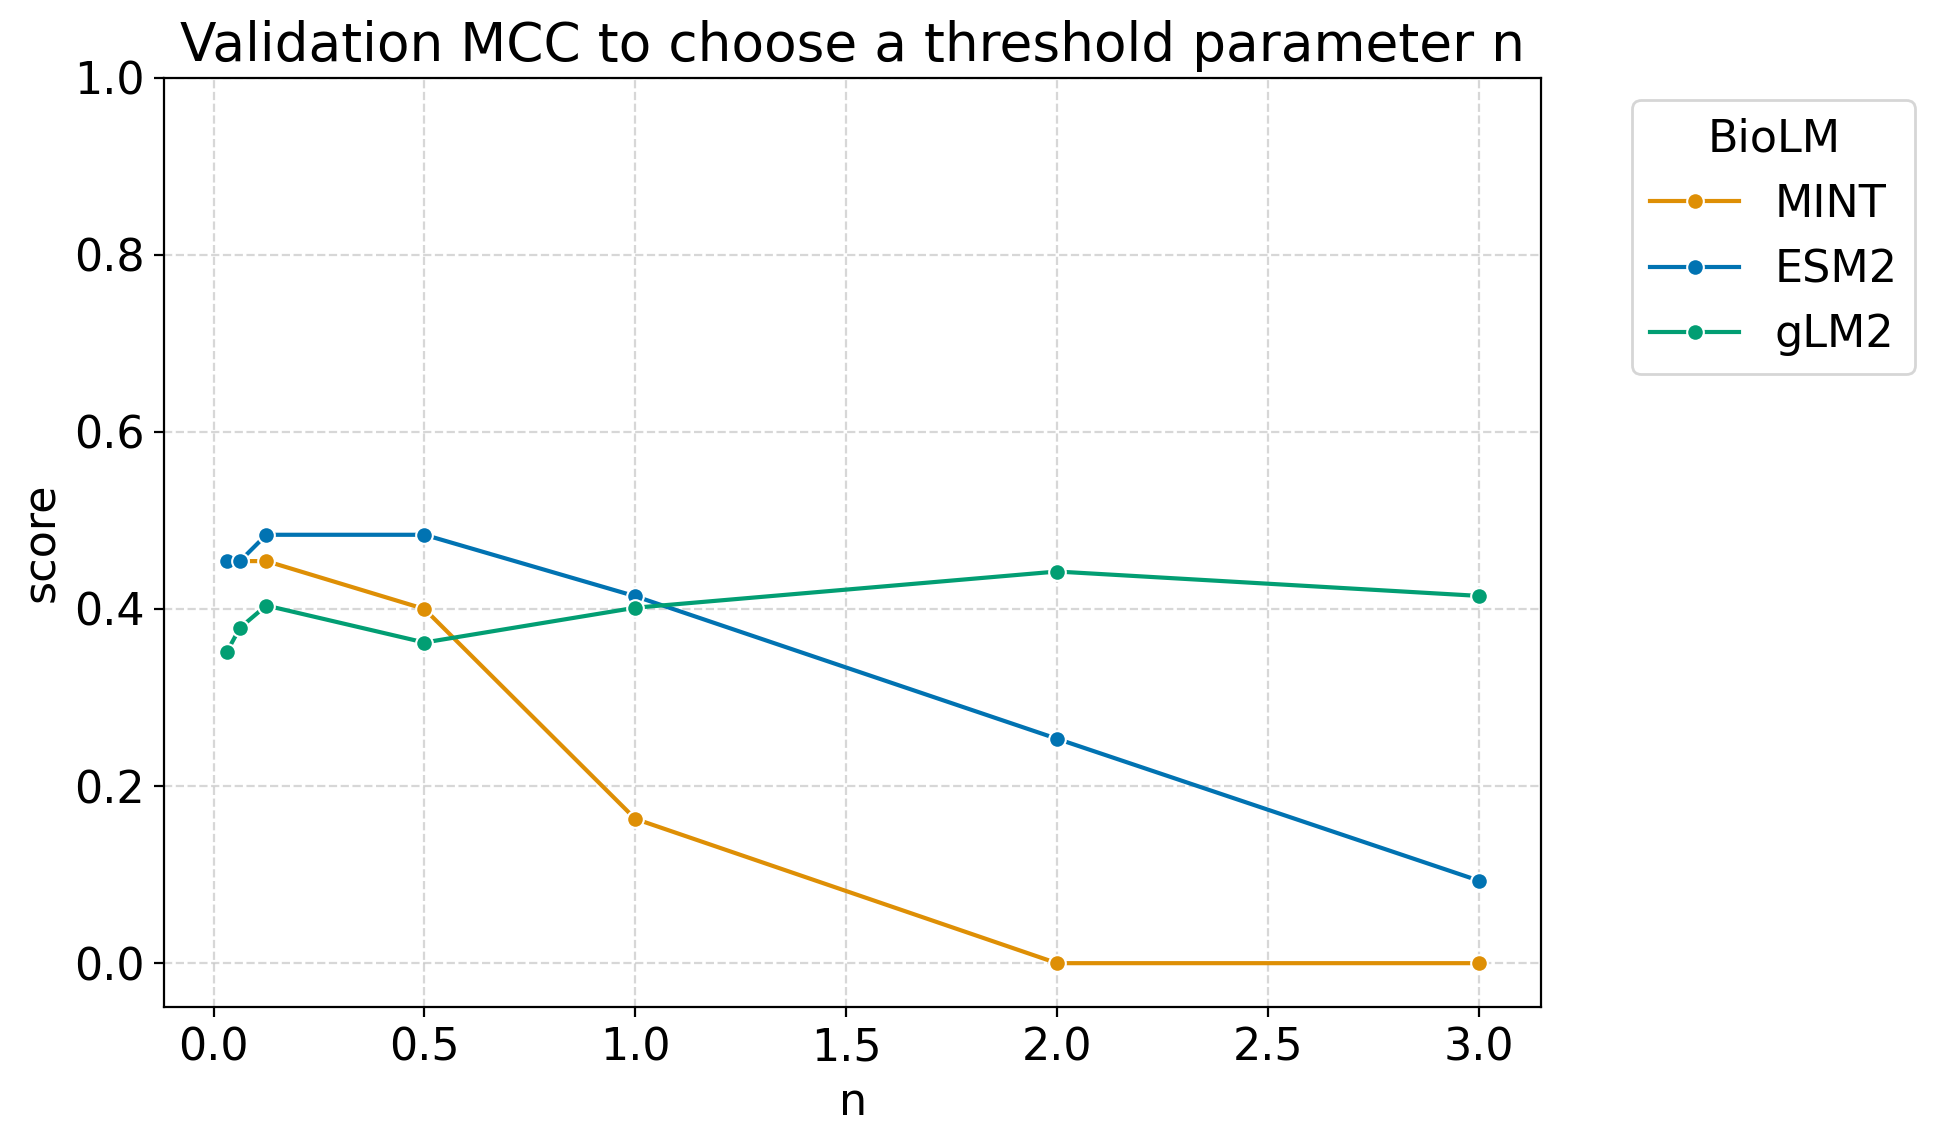

In [14]:
plot_validation_mcc("../logs/gLM.models.CategoricalJacobian/PINDER/eubacteria_5_1024_512_species_heterodimers_leak_free/cosine_fast_categorical_jacobian/")